<a href="https://colab.research.google.com/github/wiltonssa/Python_Investimentos/blob/main/20220306_Compara%C3%A7%C3%A3o_de_Carteira_com_o_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparação de uma carteira fictícia vs. IBOV

1. Instalando e importando bibliotecas

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 688 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

# 2. Importando dados

In [3]:
ativos = ['BPAN4.SA','VALE3.SA', 'WEGE3.SA','TOTS3.SA', 'BPAC11.SA',
            'KNRI11.SA','SMAL11.SA','AAPL34.SA','IVVB11.SA', 'TSLA34.SA',
	          'PETR4.SA', 'SUZB3.SA', 'JBSS3.SA', 'COCA34.SA']

In [4]:
inicio = '2020-06-01'
fim = '2022-03-06'

In [5]:
precos = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  14 of 14 completed


In [8]:
precos.head()

AAPL34.SA  BPAC11.SA  BPAN4.SA  COCA34.SA   IVVB11.SA   JBSS3.SA  \
Date                                                                           
2020-06-01  21.301838  12.005179  5.731422  39.730045  177.149994  18.242191   
2020-06-02  20.725843  13.243048  6.629345  38.147072  173.500000  18.117586   
2020-06-03  20.367697  14.246273  8.023991  38.172009  171.300003  17.112438   
2020-06-04  20.249544  14.425848  8.558925  38.050476  171.979996  17.835148   
2020-06-05  20.184311  14.423455  8.587581  38.234325  170.899994  17.403183   

             KNRI11.SA   PETR4.SA   SMAL11.SA   SUZB3.SA   TOTS3.SA  \
Date                                                                  
2020-06-01  162.248947   9.656529   96.830002  37.430347  20.040554   
2020-06-02  162.905548  10.164769  101.050003  37.401134  20.344494   
2020-06-03  164.133118  10.198018  105.199997  37.118832  21.060230   
2020-06-04  162.724731  10.179019  105.029999  38.793217  21.266127   
2020-06-05  162.620056  10.497262  107.790001  37.284317  20.354298   

            TSLA34.SA   VALE3.SA   WEGE3.SA  
Date                                         
2020-06-01  10.063916  39.906006  20.429190  
2020-06-02   9.666666  39.906006  20.555172  
2020-06-03   9.366666  40.085293  20.642395  
2020-06-04   9.225000  41.579342  21.223871  
2020-06-05   9.199916  40.794968  21.480694

In [9]:
precos.columns

Index(['AAPL34.SA', 'BPAC11.SA', 'BPAN4.SA', 'COCA34.SA', 'IVVB11.SA',
       'JBSS3.SA', 'KNRI11.SA', 'PETR4.SA', 'SMAL11.SA', 'SUZB3.SA',
       'TOTS3.SA', 'TSLA34.SA', 'VALE3.SA', 'WEGE3.SA'],
      dtype='object')

# 3. Simulação da carteira fictícia

Criando um dicionário com as alocações que vamos fazer para cada ativo da nossa carteira

In [10]:
compras = {'BPAN4.SA': 1500, 'VALE3.SA': 1400, 'WEGE3.SA': 1300, 
           'TOTS3.SA': 1200, 'BPAC11.SA': 1100, 'KNRI11.SA': 1000, 
        	'SMAL11.SA': 800, 'AAPL34.SA': 700, 'IVVB11.SA': 500, 
		      'TSLA34.SA': 500, 'PETR4.SA': 1000, 'SUZB3.SA': 1000, 
		      'JBSS3.SA': 1000, 'COCA34.SA': 1000}


In [11]:
sum(compras.values())

14000

Preços dos ativos no primeiro dia do investimento

In [12]:
primeiro = precos.iloc[0]

In [30]:
primeiro

AAPL34.SA     21.301838
BPAC11.SA     12.005179
BPAN4.SA       5.731422
COCA34.SA     39.730045
IVVB11.SA    177.149994
JBSS3.SA      18.242191
KNRI11.SA    162.248947
PETR4.SA       9.656529
SMAL11.SA     96.830002
SUZB3.SA      37.430347
TOTS3.SA      20.040554
TSLA34.SA     10.063916
VALE3.SA      39.906006
WEGE3.SA      20.429190
Name: 2020-06-01 00:00:00, dtype: float64

Transformando dicionário de alocações em data frame

In [13]:
list(compras.keys())

['BPAN4.SA',
 'VALE3.SA',
 'WEGE3.SA',
 'TOTS3.SA',
 'BPAC11.SA',
 'KNRI11.SA',
 'SMAL11.SA',
 'AAPL34.SA',
 'IVVB11.SA',
 'TSLA34.SA',
 'PETR4.SA',
 'SUZB3.SA',
 'JBSS3.SA',
 'COCA34.SA']

In [18]:
compras_df = pd.Series(data = compras, index = list(compras.keys()))

In [26]:
compras_df

BPAN4.SA     1500
VALE3.SA     1400
WEGE3.SA     1300
TOTS3.SA     1200
BPAC11.SA    1100
KNRI11.SA    1000
SMAL11.SA     800
AAPL34.SA     700
IVVB11.SA     500
TSLA34.SA     500
PETR4.SA     1000
SUZB3.SA     1000
JBSS3.SA     1000
COCA34.SA    1000
dtype: int64

Quantidade de papéis comprados de cada ativo

In [27]:
qtd_acoes = compras_df/primeiro

In [28]:
qtd_acoes

AAPL34.SA     32.861014
BPAC11.SA     91.627119
BPAN4.SA     261.715136
COCA34.SA     25.169868
IVVB11.SA      2.822467
JBSS3.SA      54.817976
KNRI11.SA      6.163368
PETR4.SA     103.556874
SMAL11.SA      8.261902
SUZB3.SA      26.716290
TOTS3.SA      59.878584
TSLA34.SA     49.682449
VALE3.SA      35.082439
WEGE3.SA      63.634438
dtype: float64

In [23]:
PL = precos*qtd_acoes

In [43]:
PL.head()

AAPL34.SA    BPAC11.SA     BPAN4.SA    COCA34.SA   IVVB11.SA  \
Date                                                                        
2020-06-01  700.000000  1100.000000  1500.000000  1000.000000  500.000000   
2020-06-02  681.072237  1213.422307  1735.000038   960.156766  489.698013   
2020-06-03  669.303174  1305.344953  2099.999800   960.784419  483.488594   
2020-06-04  665.420559  1321.798890  2240.000136   957.725464  485.407851   
2020-06-05  663.276929  1321.579647  2247.499847   962.352927  482.359582   

               JBSS3.SA    KNRI11.SA     PETR4.SA   SMAL11.SA     SUZB3.SA  \
Date                                                                         
2020-06-01  1000.000000  1000.000000  1000.000000  800.000000  1000.000000   
2020-06-02   993.169396  1004.046873  1052.631719  834.865237   999.219538   
2020-06-03   938.069221  1011.612837  1056.074872  869.152081   991.677453   
2020-06-04   977.686702  1002.932434  1054.107384  867.747572  1036.410810   
2020-06-05   954.007262  1002.287281  1087.063637  890.550440   996.098609   

               TOTS3.SA   TSLA34.SA     VALE3.SA     WEGE3.SA      PL Total  
Date                                                                         
2020-06-01  1200.000000  500.000000  1400.000000  1300.000000  14000.000000  
2020-06-02  1218.199486  480.263639  1400.000000  1308.016812  14369.762062  
2020-06-03  1261.056768  465.358894  1406.289824  1313.567202  14831.780092  
2020-06-04  1273.385551  458.320608  1458.704708  1350.569114  15150.217783  
2020-06-05  1218.786522  457.074348  1431.186947  1366.911874  15081.035854

In [44]:
PL['PL Total'] = PL.sum(axis = 1)

In [45]:
PL.head()

AAPL34.SA    BPAC11.SA     BPAN4.SA    COCA34.SA   IVVB11.SA  \
Date                                                                        
2020-06-01  700.000000  1100.000000  1500.000000  1000.000000  500.000000   
2020-06-02  681.072237  1213.422307  1735.000038   960.156766  489.698013   
2020-06-03  669.303174  1305.344953  2099.999800   960.784419  483.488594   
2020-06-04  665.420559  1321.798890  2240.000136   957.725464  485.407851   
2020-06-05  663.276929  1321.579647  2247.499847   962.352927  482.359582   

               JBSS3.SA    KNRI11.SA     PETR4.SA   SMAL11.SA     SUZB3.SA  \
Date                                                                         
2020-06-01  1000.000000  1000.000000  1000.000000  800.000000  1000.000000   
2020-06-02   993.169396  1004.046873  1052.631719  834.865237   999.219538   
2020-06-03   938.069221  1011.612837  1056.074872  869.152081   991.677453   
2020-06-04   977.686702  1002.932434  1054.107384  867.747572  1036.410810   
2020-06-05   954.007262  1002.287281  1087.063637  890.550440   996.098609   

               TOTS3.SA   TSLA34.SA     VALE3.SA     WEGE3.SA      PL Total  
Date                                                                         
2020-06-01  1200.000000  500.000000  1400.000000  1300.000000  28000.000000  
2020-06-02  1218.199486  480.263639  1400.000000  1308.016812  28739.524124  
2020-06-03  1261.056768  465.358894  1406.289824  1313.567202  29663.560184  
2020-06-04  1273.385551  458.320608  1458.704708  1350.569114  30300.435566  
2020-06-05  1218.786522  457.074348  1431.186947  1366.911874  30162.071707

# 4. Obtendo dados do IBOV

In [46]:
ibov = yf.download('^BVSP', start = inicio, end =  fim)

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [ ]:
ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1, inplace = True)

In [ ]:
ibov.head()

IBOV
Date               
2020-06-01  88620.0
2020-06-02  91046.0
2020-06-03  93002.0
2020-06-04  93829.0
2020-06-05  94637.0

Juntando tudo num dataframe só

In [ ]:
consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [ ]:
consolidado.head()

IBOV   AAPL34.SA    BPAC11.SA     BPAN4.SA    COCA34.SA  \
Date                                                                     
2020-06-01  88620.0  700.000000  1100.000000  1500.000000  1000.000000   
2020-06-02  91046.0  681.072247  1213.422576  1734.999883   960.156761   
2020-06-03  93002.0  669.303122  1305.345054  2099.999677   960.784147   
2020-06-04  93829.0  665.420530  1321.799022  2239.999887   957.725498   
2020-06-05  94637.0  663.276997  1321.579730  2247.499707   962.352987   

             IVVB11.SA     JBSS3.SA    KNRI11.SA     PETR4.SA   SMAL11.SA  \
Date                                                                        
2020-06-01  500.000000  1000.000000  1000.000000  1000.000000  800.000000   
2020-06-02  489.698013   993.169454  1004.046935  1052.631512  834.865237   
2020-06-03  483.488594   938.069275  1011.612878  1056.074699  869.152081   
2020-06-04  485.407851   977.686699  1002.932551  1054.107296  867.747572   
2020-06-05  482.359582   954.007347  1002.287386  1087.063386  890.550440   

               SUZB3.SA     TOTS3.SA   TSLA34.SA     VALE3.SA     WEGE3.SA  \
Date                                                                         
2020-06-01  1000.000000  1200.000000  500.000000  1400.000000  1300.000000   
2020-06-02   999.219623  1218.199432  480.263655  1400.000000  1308.016996   
2020-06-03   991.677488  1261.056535  465.358927  1406.289880  1313.567243   
2020-06-04  1036.410853  1273.385369  458.320562  1458.704688  1350.569208   
2020-06-05   996.098719  1218.786503  457.074381  1431.186831  1366.911995   

                PL Total  
Date                      
2020-06-01  14000.000000  
2020-06-02  14369.762324  
2020-06-03  14831.779601  
2020-06-04  15150.217588  
2020-06-05  15081.035992

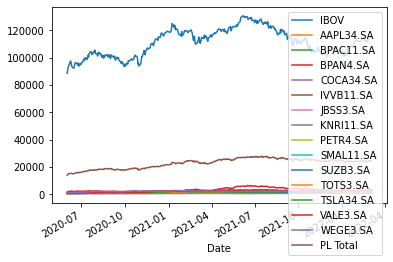

In [ ]:
consolidado.plot()

# 5. Comparando nossa carteira com o IBOV

Normalizando os dados para ajustar a escala

In [ ]:
consolidado_adj = consolidado/consolidado.iloc[0]

In [ ]:
consolidado_adj.head()

IBOV  AAPL34.SA  BPAC11.SA  BPAN4.SA  COCA34.SA  IVVB11.SA  \
Date                                                                         
2020-06-01  1.000000   1.000000   1.000000  1.000000   1.000000   1.000000   
2020-06-02  1.027375   0.972960   1.103111  1.156667   0.960157   0.979396   
2020-06-03  1.049447   0.956147   1.186677  1.400000   0.960784   0.966977   
2020-06-04  1.058779   0.950601   1.201635  1.493333   0.957725   0.970816   
2020-06-05  1.067897   0.947539   1.201436  1.498333   0.962353   0.964719   

            JBSS3.SA  KNRI11.SA  PETR4.SA  SMAL11.SA  SUZB3.SA  TOTS3.SA  \
Date                                                                       
2020-06-01  1.000000   1.000000  1.000000   1.000000  1.000000  1.000000   
2020-06-02  0.993169   1.004047  1.052632   1.043582  0.999220  1.015166   
2020-06-03  0.938069   1.011613  1.056075   1.086440  0.991677  1.050880   
2020-06-04  0.977687   1.002933  1.054107   1.084684  1.036411  1.061154   
2020-06-05  0.954007   1.002287  1.087063   1.113188  0.996099  1.015655   

            TSLA34.SA  VALE3.SA  WEGE3.SA  PL Total  
Date                                                 
2020-06-01   1.000000  1.000000  1.000000  1.000000  
2020-06-02   0.960527  1.000000  1.006167  1.026412  
2020-06-03   0.930718  1.004493  1.010436  1.059413  
2020-06-04   0.916641  1.041932  1.038899  1.082158  
2020-06-05   0.914149  1.022276  1.051471  1.077217

In [ ]:
consolidado_adj.tail()

IBOV  AAPL34.SA  BPAC11.SA  BPAN4.SA  COCA34.SA  IVVB11.SA  \
Date                                                                         
2022-02-24  1.259219   1.947433   2.142210  1.761788   1.253793   1.343494   
2022-02-25  1.276710   1.976405   2.089580  1.740918   1.316899   1.385831   
2022-03-02  1.299639   1.975470   2.068199  1.742657   1.296108   1.375106   
2022-03-03  1.299549   1.941358   2.028726  1.740918   1.273850   1.348010   
2022-03-04  1.291738   1.922433   1.980208  1.733961   1.284612   1.349704   

            JBSS3.SA  KNRI11.SA  PETR4.SA  SMAL11.SA  SUZB3.SA  TOTS3.SA  \
Date                                                                       
2022-02-24  1.870988   0.762463  2.020730   1.151503  1.419338  1.631746   
2022-02-25  1.839719   0.779179  2.057647   1.146752  1.449341  1.643181   
2022-03-02  1.873551   0.772786  2.098194   1.156770  1.447499  1.658096   
2022-03-03  1.839719   0.772493  2.072171   1.161520  1.414075  1.663068   
2022-03-04  1.836644   0.774018  2.071566   1.143241  1.508820  1.614841   

            TSLA34.SA  VALE3.SA  WEGE3.SA  PL Total  
Date                                                 
2022-02-24   4.272690  2.008347  1.421888  1.716940  
2022-02-25   4.272690  2.117092  1.425767  1.733721  
2022-03-02   4.641996  2.286175  1.466988  1.770813  
2022-03-03   4.372055  2.287322  1.514029  1.752118  
2022-03-04   4.372055  2.339401  1.528093  1.755393

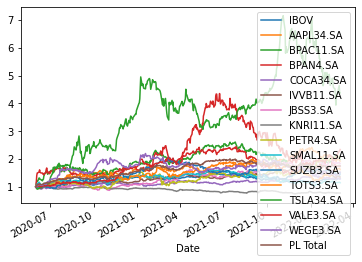

In [ ]:
consolidado_adj.plot()

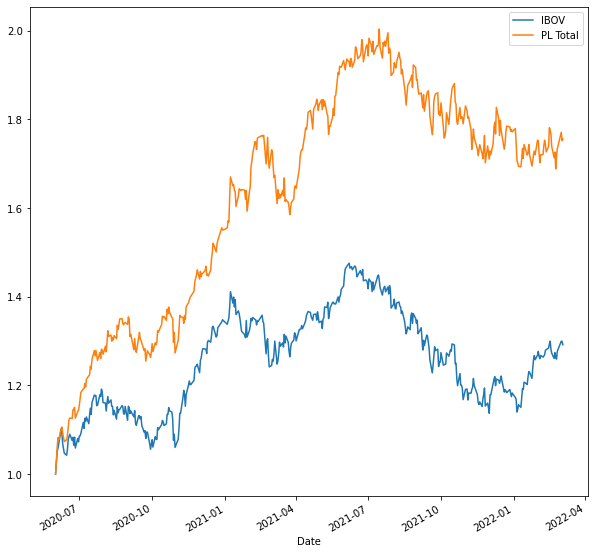

In [ ]:
consolidado_adj[['IBOV', 'PL Total']].plot(figsize = (10,10));